# ANALYZING SEPSIS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

Reading the Sepsis Dataset and converting it to dataframe for further Analysis.

In [3]:
dfsp=pd.read_csv(r"C:\Users\renij\sepsisnotebook\sepsisdataset.csv")
dfsp.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


##### checking the dataset for datatypes,nulls,special character

In [4]:
dfsp.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [5]:
dfsp.dtypes


Unnamed: 0            int64
Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           

In [6]:

dfsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

The . info() method allows us to learn the shape of object types of our data. The . describe() method gives us summary statistics for numerical columns in our DataFrame.

###### To check the length of the dataframe

In [7]:
len(dfsp)

1552210

So there is 1.5 million records in the dataset.

###### To check the duplicate in column and remove the duplicates

#dfsp.Patient_ID.duplicated().sum()
#sum() will sum the 1's and 0's. count() only counts the number of non missing values,
#so records with NaN s or other missing values are not included in that count.

As there is duplicates in to find the unique record in a patient ID


In [8]:

r=dfsp.Patient_ID.unique()
#to convert array to dataframe
uniquedf= pd.DataFrame(r,columns=['uniqueid'])
uniquedf

,uniqueid
0,17072
1,16153
2,465
3,9891
4,8065
...,...
40331,104763
40332,118556
40333,105149
40334,112699


In [9]:
uniquecount=len(uniquedf)
uniquecount

40336

## Analysis

###### 1.Create Visualization of Percentage of patients with non-sepsis.

#### use this table for distinct data

In [10]:
dfdemo_dist = dfsp.groupby('Patient_ID').max().reset_index()
dfdemo_dist

,Patient_ID,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,53,53,117.0,100.0,37.44,181.0,141.33,NaN,32.0,...,14.7,NaN,338.0,83.14,0,NaN,NaN,-0.03,54,0
1,2,22,22,94.0,100.0,36.44,194.0,116.00,66.0,27.0,...,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,23,0
2,3,47,47,93.0,99.0,38.61,159.0,99.00,69.0,40.0,...,10.0,NaN,488.0,45.82,0,1.0,0.0,-1195.71,48,0
3,4,28,28,113.0,100.0,36.78,132.5,84.00,61.5,26.0,...,7.6,NaN,220.0,65.71,0,0.0,1.0,-8.77,29,0
4,5,47,47,88.0,99.0,37.33,150.0,103.00,NaN,21.0,...,8.1,NaN,288.0,28.09,1,1.0,0.0,-0.05,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,119996,47,47,124.0,100.0,37.00,164.0,105.00,109.0,23.0,...,12.6,NaN,238.0,84.00,0,NaN,NaN,-6.69,48,0
40332,119997,24,24,80.0,100.0,37.30,156.0,193.50,90.0,26.0,...,10.8,NaN,201.0,30.00,1,NaN,NaN,-0.02,25,0
40333,119998,48,48,103.0,100.0,37.60,205.5,158.50,130.5,26.0,...,13.6,NaN,225.0,60.00,0,1.0,0.0,-53.64,49,0
40334,119999,19,19,106.0,100.0,37.90,164.0,114.00,82.0,27.0,...,11.4,NaN,272.0,84.00,0,1.0,0.0,-10.74,20,0


In [11]:

dfsp.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [12]:
p= dfsp.groupby(['Patient_ID', 'SepsisLabel'])['SepsisLabel'].size().unstack(fill_value=0).reset_index()
p

SepsisLabel,Patient_ID,0,1
0,1,54,0
1,2,23,0
2,3,48,0
3,4,29,0
4,5,48,0
...,...,...,...
40331,119996,48,0
40332,119997,25,0
40333,119998,49,0
40334,119999,20,0


In [13]:
p['exists']=np.nan
for i in p.index:
    if((p[0][i]>0) and (p[1][i]>0)):
        p['exists'][i]='yes'
    else:
        p['exists'][i]='no'
p.head(10)        

SepsisLabel,Patient_ID,0,1,exists
0,1,54,0,no
1,2,23,0,no
2,3,48,0,no
3,4,29,0,no
4,5,48,0,no
5,6,17,0,no
6,7,45,0,no
7,8,40,0,no
8,9,248,10,yes
9,10,23,0,no


In [14]:
#p1=p['Patient_ID'][p[0]>0]
#p2=p['Patient_ID'][p['exists']=='no']

dfnonsepsis=p[(p[0]>0) & (p['exists']=='no')][['Patient_ID']]
dfnonsepsis['Patient_ID']

0             1
1             2
2             3
3             4
4             5
          ...  
40331    119996
40332    119997
40333    119998
40334    119999
40335    120000
Name: Patient_ID, Length: 37404, dtype: int64

In [15]:
dfonsetsepsis=p[(p['exists']=='yes')][['Patient_ID']]
dfsepsishalf=p[(p[1]>0) & (p['exists']=='no')][['Patient_ID']]
dfsepsis=pd.concat([dfonsetsepsis,dfsepsishalf])

In [16]:
nonsepsiscount=0
sepsiscountnotful=0
onsetsepsis=0


for i in p.index:
    if((p[0][i]>0)and (p['exists'][i]=='no') ):
        nonsepsiscount=  nonsepsiscount+1
    elif((p['exists'][i]=='yes')):
        onsetsepsis=onsetsepsis+1
        
    else:
        sepsiscountnotful=sepsiscountnotful+1
        
sepsiscount=onsetsepsis+sepsiscountnotful 
nonsepsiscountper=(nonsepsiscount/uniquecount)*100

sepsiscountper=(sepsiscount/uniquecount)*100

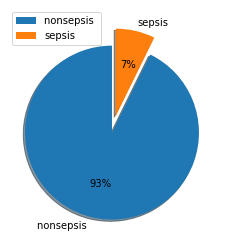

In [17]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([nonsepsiscountper,sepsiscountper])
mylabels = ["nonsepsis ","sepsis"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode,autopct=lambda p: '{:.0f}%'.format(p),shadow=True, startangle=90)
plt.legend()
plt.show() 


###### 2.female and male count

In [18]:
dfsp1=dfsp.copy()
dspfemale=dfsp1['Patient_ID'][(dfsp1['Gender']==0)].unique()
l=len(dspfemale)
l

17770

In [19]:
dfsp2=dfsp.copy()
dspmale=dfsp1['Patient_ID'][(dfsp1['Gender']==1)].unique()
k=len(dspmale)
k

22566

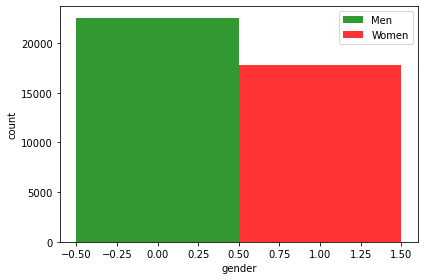

In [21]:
n_groups = 1


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width =1
opacity = 0.8

rects1 = plt.bar(index,k, bar_width,
alpha=opacity,
color='g',
label='Men')

rects2 = plt.bar(index + bar_width, l, bar_width,alpha=opacity,
color='r',
label='Women')

plt.xlabel('gender')
plt.ylabel('count')


plt.legend()

plt.tight_layout()
plt.show()

###### 3.sepsis patient in MICU and SICU

In [22]:
dfmergesepsis=pd.merge(dfsepsis,dfsp,how="inner",on="Patient_ID")
len(dfmergesepsis['Patient_ID'][(dfmergesepsis['Unit1']==1)].unique())

966

In [23]:
len(dfmergesepsis['Patient_ID'][(dfmergesepsis['Unit2']==1)].unique())

650

###### 4.nonsepsis patient in MICU and SICU

In [24]:
dfmergenonsepsis=pd.merge(dfnonsepsis,dfsp,how="inner",on="Patient_ID")
len(dfmergenonsepsis['Patient_ID'][(dfmergenonsepsis['Unit1']==1)].unique())

11301

In [25]:
dfmergenonsepsis=pd.merge(dfnonsepsis,dfsp,how="inner",on="Patient_ID")
len(dfmergenonsepsis['Patient_ID'][(dfmergenonsepsis['Unit2']==1)].unique())

11802

###### 5.patient count by age and gender distribution

In [26]:
dfspneed=dfdemo_dist[['Patient_ID','Gender','HospAdmTime','Age','SepsisLabel','ICULOS']]
dfspneed

,Patient_ID,Gender,HospAdmTime,Age,SepsisLabel,ICULOS
0,1,0,-0.03,83.14,0,54
1,2,0,-98.60,75.91,0,23
2,3,0,-1195.71,45.82,0,48
3,4,0,-8.77,65.71,0,29
4,5,1,-0.05,28.09,0,49
...,...,...,...,...,...,...
40331,119996,0,-6.69,84.00,0,48
40332,119997,1,-0.02,30.00,0,25
40333,119998,0,-53.64,60.00,0,49
40334,119999,0,-10.74,84.00,0,20


##### AGE BIN

In [27]:
agebin = [0,10,20,30,40,50,60,70,80,90,100]
dfspneed['agebin']=pd.cut(dfdemo_dist.Age,bins=agebin,labels=[10,20,30,40,50,60,70,80,90,100])
dfspneed

,Patient_ID,Gender,HospAdmTime,Age,SepsisLabel,ICULOS,agebin
0,1,0,-0.03,83.14,0,54,90
1,2,0,-98.60,75.91,0,23,80
2,3,0,-1195.71,45.82,0,48,50
3,4,0,-8.77,65.71,0,29,70
4,5,1,-0.05,28.09,0,49,30
...,...,...,...,...,...,...,...
40331,119996,0,-6.69,84.00,0,48,90
40332,119997,1,-0.02,30.00,0,25,30
40333,119998,0,-53.64,60.00,0,49,60
40334,119999,0,-10.74,84.00,0,20,90


In [28]:
dfsagegendercount=dfspneed.groupby(['agebin','Gender'])['Patient_ID'].count().reset_index(name='count')
display(dfsagegendercount)

,agebin,Gender,count
0,10,0,0
1,10,1,0
2,20,0,148
3,20,1,148
4,30,0,840
5,30,1,907
6,40,0,1199
7,40,1,1300
8,50,0,2127
9,50,1,2868


<AxesSubplot:xlabel='agebin'>

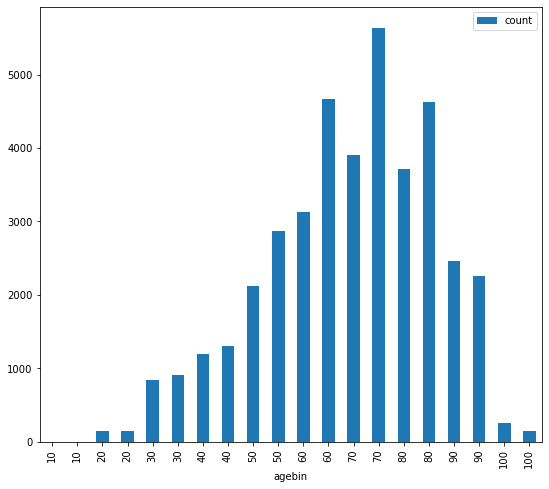

In [29]:

dfsagegendercount.plot(x="agebin", y=["count"], kind="bar", figsize=(9, 8))

      

<AxesSubplot:xlabel='agebin'>

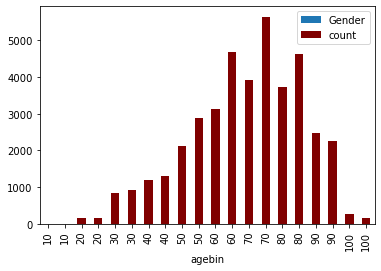

In [30]:
ax=dfsagegendercount.plot(x="agebin", y="Gender", kind="bar")
# plotting age on the same axis
dfsagegendercount.plot(x="agebin", y="count", kind="bar", ax=ax, color="maroon")


<BarContainer object of 20 artists>

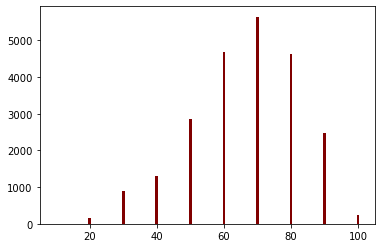

In [31]:
ax = plt.subplot()
ax.bar(dfsagegendercount["agebin"], dfsagegendercount["Gender"])
ax.bar(dfsagegendercount["agebin"], dfsagegendercount["count"], color="maroon")

In [32]:
dfsagecount=dfspneed.groupby(['agebin'])['Patient_ID'].count().reset_index(name='count')
display(dfsagecount)

,agebin,count
0,10,0
1,20,296
2,30,1747
3,40,2499
4,50,4995
5,60,7796
6,70,9545
7,80,8340
8,90,4726
9,100,392


<AxesSubplot:xlabel='agebin'>

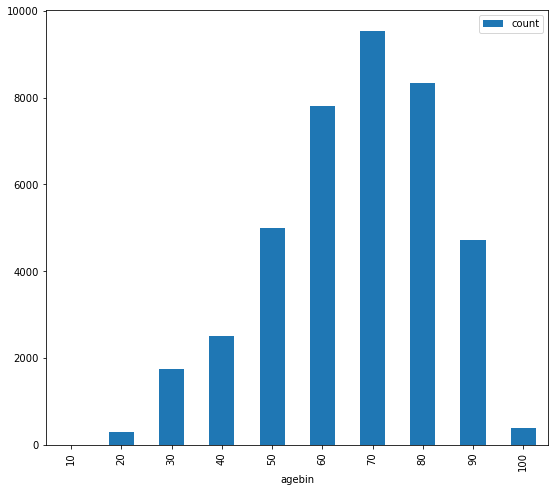

In [33]:
dfsagecount.plot(x="agebin", y=["count"], kind="bar", figsize=(9, 8))
#plt.xlabel("x values", size=12)
#plt.ylabel("y values", size=12)
#plt.title("Learning more about pyplot with random numbers chart", size=15)
#for index in range(len(x)):
#  ax.text(x[index], y[index], y[index], size=12)
#plt.show()

###### 6.sepsis count dstribution based on age

In [34]:
dfsepsis
 

SepsisLabel,Patient_ID
8,9
10,11
14,15
17,18
21,22
...,...
39890,119555
40013,119678
40100,119765
40189,119854


In [35]:

agebin = [0,10,20,30,40,50,60,70,80,90,100]
dfdemo_dist['agebin']=pd.cut(dfdemo_dist.Age,bins=agebin,labels=[10,20,30,40,50,60,70,80,90,100])
dfdemo_dist

,Patient_ID,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,agebin
0,1,53,53,117.0,100.0,37.44,181.0,141.33,NaN,32.0,...,NaN,338.0,83.14,0,NaN,NaN,-0.03,54,0,90
1,2,22,22,94.0,100.0,36.44,194.0,116.00,66.0,27.0,...,NaN,158.0,75.91,0,0.0,1.0,-98.60,23,0,80
2,3,47,47,93.0,99.0,38.61,159.0,99.00,69.0,40.0,...,NaN,488.0,45.82,0,1.0,0.0,-1195.71,48,0,50
3,4,28,28,113.0,100.0,36.78,132.5,84.00,61.5,26.0,...,NaN,220.0,65.71,0,0.0,1.0,-8.77,29,0,70
4,5,47,47,88.0,99.0,37.33,150.0,103.00,NaN,21.0,...,NaN,288.0,28.09,1,1.0,0.0,-0.05,49,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,119996,47,47,124.0,100.0,37.00,164.0,105.00,109.0,23.0,...,NaN,238.0,84.00,0,NaN,NaN,-6.69,48,0,90
40332,119997,24,24,80.0,100.0,37.30,156.0,193.50,90.0,26.0,...,NaN,201.0,30.00,1,NaN,NaN,-0.02,25,0,30
40333,119998,48,48,103.0,100.0,37.60,205.5,158.50,130.5,26.0,...,NaN,225.0,60.00,0,1.0,0.0,-53.64,49,0,60
40334,119999,19,19,106.0,100.0,37.90,164.0,114.00,82.0,27.0,...,NaN,272.0,84.00,0,1.0,0.0,-10.74,20,0,90


In [36]:
dfsepsismerge=pd.merge(dfdemo_dist,dfsepsis,how="inner",on="Patient_ID")
dfsepsismerge[['Patient_ID','SepsisLabel','agebin']]
dfsepsismerge5=dfsepsismerge.groupby(['agebin'])['Patient_ID'].count().reset_index(name="count")
dfsepsismerge5

,agebin,count
0,10,0
1,20,20
2,30,125
3,40,169
4,50,361
5,60,547
6,70,683
7,80,658
8,90,343
9,100,26


<AxesSubplot:xlabel='agebin'>

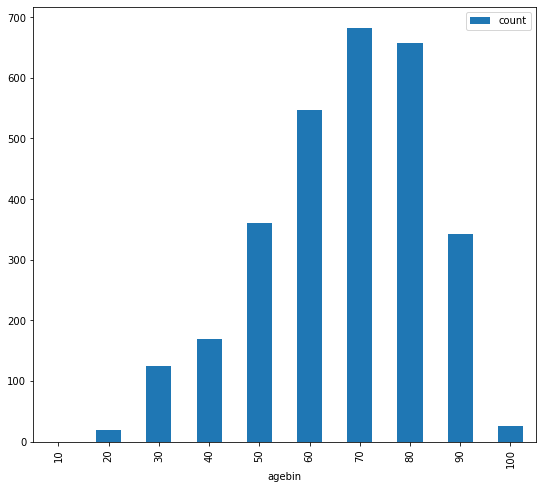

In [37]:
dfsepsismerge5.plot(x="agebin", y=["count"], kind="bar", figsize=(9, 8))

###### .7 .ICU LOS for Patients

In [38]:
dfsp[['Patient_ID','ICULOS']]
dflos=dfsp.groupby(['ICULOS'])['Patient_ID'].count().reset_index(name='count')
dflos

,ICULOS,count
0,1,31543
1,2,35672
2,3,37569
3,4,38718
4,5,39371
...,...,...
331,332,18
332,333,18
333,334,18
334,335,17


<BarContainer object of 336 artists>

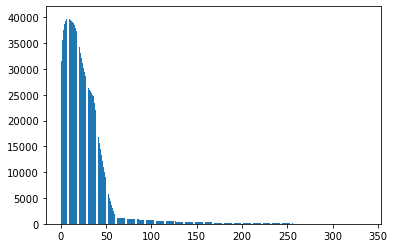

In [39]:

dfg=dflos.sort_values('count', ascending=True)
plt.bar(dfg['ICULOS'],dfg['count'])

###### 8. ICULOS for onset patients

In [40]:
dfonsetsepsis


SepsisLabel,Patient_ID
8,9
10,11
14,15
17,18
21,22
...,...
40223,119888
40245,119910
40252,119917
40273,119938


In [41]:
dfdemotest=dfsp[['Patient_ID','ICULOS']]
dfmergeonset=pd.merge(dfonsetsepsis,dfdemotest,how='inner',on='Patient_ID')

In [42]:
dflosonset=dfmergeonset.groupby(['ICULOS'])['Patient_ID'].count().reset_index(name='count')
dflosonset

,ICULOS,count
0,1,1905
1,2,2204
2,3,2331
3,4,2397
4,5,2435
...,...,...
331,332,4
332,333,4
333,334,4
334,335,3


<BarContainer object of 336 artists>

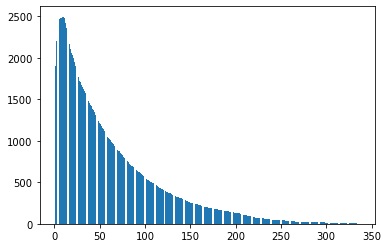

In [43]:

dfge=dflosonset.sort_values('count', ascending=True)
plt.bar(dfge['ICULOS'],dfge['count'])

###### 9HOSPADMTIME VS COUNT OF PATIENTS

In [44]:
dfsp[['Patient_ID','HospAdmTime']]
dfadmin=dfsp.groupby(['HospAdmTime','Patient_ID'])['Patient_ID'].count().reset_index(name='count')
dfadmin

,HospAdmTime,Patient_ID,count
0,-5366.86,100785,260
1,-3710.66,4867,56
2,-3397.64,119788,36
3,-3342.34,115122,41
4,-3322.90,7117,43
...,...,...,...
40330,16.02,2691,17
40331,17.34,7341,45
40332,20.04,14146,30
40333,22.04,20534,28


In [45]:
CNT_Hosp_ICU = len(dfadmin.loc[dfadmin.HospAdmTime < 0])
CNT_ICU = len(dfadmin.loc[dfadmin.HospAdmTime == 0])
CNT_ICU_Hosp = len(dfadmin.loc[dfadmin.HospAdmTime > 0])
lst_HospAdmTime = [CNT_Hosp_ICU, CNT_ICU, CNT_ICU_Hosp]
lst_HospAdmTime

[38767, 1313, 255]